# Loading the Dataset

In [2]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import linear_model

# Load DataFrame from file_path
## Cancer rates data are taken from: https://science.sciencemag.org/content/371/6535/1245?utm_campaign=toc_sci-mag_2021-03-18&et_rid=681382821&et_cid=3704890
data_folder = Path('./data/')
file = data_folder / 'Data.Log10LifetimeRisk.Log10TotaStemCellDivisions.txt'
cancer_sc_df = pd.read_csv(file, sep='\t', names=['Tissue', 'Log10LifetimeRisk', 'Log10TotaStemCellDivisions'], na_values='-')

# Removing NaN values from DataFrame
cancer_sc_df = cancer_sc_df.dropna()
cancer_sc_df

,Tissue,Log10LifetimeRisk,Log10TotaStemCellDivisions
4,Appendicular_Skeleton_Forelimbs,-4.397940,6.658011
5,Appendicular_Skeleton_Hindlimbs,-3.657577,7.046495
6,Appendicular_Skeleton_Pelvis,-4.522879,6.498311
11,Brain_Hind,-3.958607,8.434569
12,Brain_Mid_and_Fore,-2.659556,8.431364
16,Colorectal_Glands,-1.318759,12.067443
21,Dermis,-0.522879,12.550228
22,Duodenal_Glands,-3.522879,9.891872
26,Epidermis,-1.692504,11.882980
29,Esophageal_Epithelium,-2.712646,9.080266


# Why the Analyses Will Be Done On Log Transformed Data

### Histograms of the Non-Log Transformed Data

Histogram for the liftime risk of cancer (in decimals)


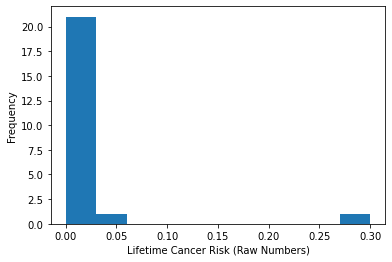

In [3]:
# Reversing the log transformation for lifetime risk
RegRisk = np.power(10, cancer_sc_df['Log10LifetimeRisk'])
plt.hist(RegRisk)
plt.xlabel('Lifetime Cancer Risk (Raw Numbers)')
plt.ylabel('Frequency')
print('Histogram for the liftime risk of cancer (in decimals)')

Histogram for the raw values of total stem cell divisions (to a factor of e^12)


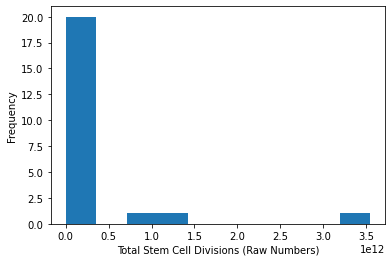

In [4]:
# Reversing the log transformation for stem cells
RegStem = np.power(10, cancer_sc_df['Log10TotaStemCellDivisions'])
plt.hist(RegStem)
plt.xlabel('Total Stem Cell Divisions (Raw Numbers)')
plt.ylabel('Frequency')
print('Histogram for the raw values of total stem cell divisions (to a factor of e^12)')

As shown by both histograms, the non-log transformed data is incredibly skewed

### Histograms of the Log Transformed Data

Histogram for both log transformed datasets


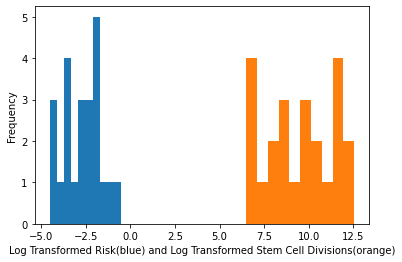

In [5]:
# Both histograms while log transformed
plt.hist(cancer_sc_df['Log10LifetimeRisk'])
plt.hist(cancer_sc_df['Log10TotaStemCellDivisions'])
plt.xlabel('Log Transformed Risk(blue) and Log Transformed Stem Cell Divisions(orange)')
plt.ylabel('Frequency')
print('Histogram for both log transformed datasets')

In [6]:
print(cancer_sc_df.describe())

       Log10LifetimeRisk  Log10TotaStemCellDivisions
count          23.000000                   23.000000
mean           -2.721660                    9.441104
std             1.071136                    1.930491
min            -4.522879                    6.498311
25%            -3.506167                    7.830736
50%            -2.552842                    9.524785
75%            -1.924754                   11.273209
max            -0.522879                   12.550228


By comparison, the log-transformed data much more closely resembles a bell-curve. As such, data analyses will be performed on the log-transformed data.

# Correlation Test

### Regression Model

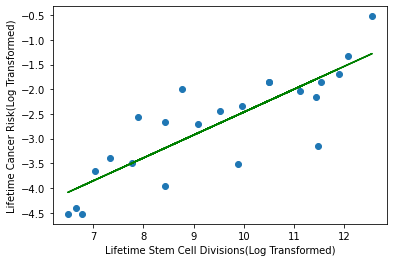

This linear regression model has a coefficient of determination of 0.6995519607987079 and a slope of [[0.46407323]]


In [7]:
# Creating a linear regression model to look for correlations

# Variables
x = cancer_sc_df[['Log10TotaStemCellDivisions']]
y = cancer_sc_df[['Log10LifetimeRisk']]

linear = linear_model.LinearRegression()
linear.fit(x, y)

y_pred = linear.predict(x)

# Plotting the scatterplot 
plt.plot(x, y_pred, color='green')
plt.scatter(x, y)
plt.xlabel('Lifetime Stem Cell Divisions(Log Transformed)')
plt.ylabel('Lifetime Cancer Risk(Log Transformed)')
plt.show()

# R^2 value of linear regression model
print('This linear regression model has a coefficient of determination of {0} and a slope of {1}'.format(linear.score(x, y), linear.coef_))

### Pearson's Correlation Coefficient & P-Value

In [8]:
# Converting DataFrame to NumPy arrays
xarray = cancer_sc_df['Log10TotaStemCellDivisions'].to_numpy()
yarray = cancer_sc_df['Log10LifetimeRisk'].to_numpy()

# Calculating R-value and P-value using NumPy arrays
RPvalues = stats.pearsonr(xarray, yarray)
print('The linear regression model has a R-value and P-value of {0}, respectively'.format(RPvalues))

The linear regression model has a R-value and P-value of (0.8363922290401244, 6.638030189718123e-07), respectively


As the p-value is below 0.05, the null hypothesis is rejected. A linear and direct correlation between the two (log-transformed) variables is suggested.